# MAST30034 Project 2 Summary Notebook

Group Number: 06\
Group Members:
- Rui Li(lrl3@student.unimelb.edu.au) 1237956
- Lingxiao Qu(lingxiaoq@student.unimelb.edu.au) 1266391
- Jinzhuo Zheng(jinzhuoz@student.unimelb.edu.au) 1261345
- Jianing Lu(lujl5@student.unimelb.edu.au) 1079029
- Cheng Qian (cqq1@student.unimelb.edu.au) 1266297

## Answers to the Topic Questions

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### 1. What are the most important internal and external features in predicting rental prices? 

According to our analysis, we find that these features are relatively important.
- Internal Features: bed_num and bath_num
- External Features: average_income and nearest train distance

Note: Evidence and analysis are given below

### 2. What are the top 10 suburbs with the highest predicted growth rate?

In [2]:
top10_gr = pd.read_csv('data/curated/combined_top10.csv')
top10_gr

,postcode,Growth_Rate
0,"[3546, 3551, 3544, 3540, 3549, 3542]",86.067364
1,"[3345, 3270, 3271, 3272]",80.898826
2,"[3475, 3444, 3472, 3489, 3488, 3487]",59.616612
3,"[3413, 3412, 3334, 3331, 3336, 3409, 3333, 341...",54.366999
4,[3335],44.783160
5,"[3725, 3719, 3738]",44.719061
6,[3350],43.023342
7,[3747],40.050704
8,"[3352, 3354]",37.827677
9,"[3243, 3269, 3268, 3250, 3249, 3242, 3241, 323...",36.622890


### 3. What are the most liveable and affordable suburbs according to your chosen metrics?

In [3]:
livabile = pd.read_csv("data/curated/top10_liveable_score.csv")
livabile

,postcode,livability_score
0,3919,0.640841
1,3915,0.617110
2,3146,0.612525
3,3913,0.606643
4,3144,0.594038
5,3018,0.585742
6,3638,0.585353
7,3636,0.584282
8,3084,0.581495
9,3015,0.574476


## Assumptions:

- The data we scraped from the domain is balanced and representative of the rental situation in 2023.
- All the outliers we removed are not within the scope of our analysis.
- Due to the unavailability of data for the current year, we assume that data from previous years to some extent represents the current year's data.
- The calculation of the three nearest straight-line distances will inherently include the nearest driving distance.
- When performing linear regression, we assume that the features (income, population, and crime rate) exhibit a linear relationship.

## Data
### Main Dataset

Our primary dataset has been sourced through web scraping from [Domain](https://www.domain.com.au), a leading Australian real estate website. A maximum of 5 web pages of rental properties for postcode in VIC were scraped. The *web_scraping.ipynb* notebook works by first scraping the URLs from the main Domain.com per postcode, then looping through each URL to extract the features. 

This dataset encapsulates vital property attributes, including:

- **Name**: The property's title or identification.
- **Cost_text**: The textual representation of the property's cost or listing price.
- **Rooms**: Details about the number of bedrooms, bathrooms, and possibly other rooms.
- **Parking**: Information regarding available parking facilities or spaces.
- **Coordinates**: Geographic data pinpointing the exact location of the property.

We hypothesized that these features would exert a significant influence on the property's pricing dynamics. To ensure a comprehensive dataset, we delved into specific postcode ranges (from 3000 to 4000), scraping data from the initial five pages of the most recommended properties within each postcode. This method was adopted to obtain a diverse and representative sample. However, due to constraints like the limited number of listings in some areas, our dataset's final tally amounted to over 9000 unique property listings.
Several external datasets are employed to support the analysis of rental price, which can be devided into the following main categories: historical record, population, income, and nearest amenities.

### External Dataset

Several external datasets are employed to fortify our analysis of rental prices. These datasets, sourced from various reliable platforms, primarily delve into the following categories:

- **[Historical Records](https://www.dffh.vic.gov.au/publications/rental-report)**: This category provides insights into past trends, patterns, and dynamics of rental prices. 

- **[Income](https://www.abs.gov.au/methodologies/data-region-methodology/2011-22)**: Financial metrics and income distribution play a pivotal role in determining the rental affordability and, in turn, influence the pricing structures of various regions.
  
- **[Population](https://discover.data.vic.gov.au/dataset/vif2019-population-households-dwellings-vifsa-lga-2036)**: Population growth, density, and demographic patterns offer cues about the demand for rentals and its subsequent impact on prices.
  
- **[Crime Rate](https://www.crimestatistics.vic.gov.au/crime-statistics/latest-crime-data-by-area)**: The safety of a region is paramount, and crime rates can significantly affect rental values.

- **[Shopping Mall](https://www.australia-shoppings.com/malls-centres/victoria)**: Drawing information from our custom data scraped from various online platforms, this category focuses on the proximity and availability of shopping amenities.

- **[Transport - Train](https://datashare.maps.vic.gov.au/search?md=b6722101-8db5-51f0-8a6f-d1e4fe805b73)**: The availability and frequency of transportation, especially trains, are essential for accessibility.

- **[National Park](https://localfoodconnect.org.au/links/national-parks-in-victoria/)**: Green spaces add value to living areas. Parks, green belts, and other recreational areas in proximity can be a significant value addition to rental properties.

- **[School](https://discover.data.vic.gov.au/dataset/school-locations-2023)**: Proximity to educational institutions, especially schools, is often a sought-after attribute by families, influencing rental prices.

- **[Hospital](http://overpass-api.de/api/interpreter)**: Quick access to healthcare facilities is a significant factor for many when choosing a rental property.

By integrating these external datasets, we aim to create a comprehensive view of the factors influencing rental prices across different regions.


## Preprocessing

### Main dataset

#### Feature Engineering

In this step, we performed several key transformations and manipulations on our dataset:

* **Price Extraction**: We extracted price information from the 'cost_text' column and created a new 'price' column.

* **Bedroom and Bathroom Extraction**: We obtained the number of bedrooms and bathrooms from the 'rooms' column, and stored them in new 'bed' and 'bath' columns.

* **Parking Extraction**: The parking details were extracted from the 'parking' column and saved in the 'park_num' column.

* **Postcode Extraction**: We extracted the postcode from the 'name' column and created a new 'postcode' column.

* **Coordinates Splitting**: The 'coordinates' column was split into 'Latitude' and 'Longitude' columns, accounting for cases where 'coordinates' may be None.

* **Dropping Insufficient Features**: We removed columns such as 'cost_text', 'rooms', 'parking', and 'desc' to eliminate unnecessary or redundant features.

* **Handling Missing Values**: Rows containing missing values ('NaN') were removed.

These preprocessing and feature engineering steps have prepared our dataset for subsequent analysis and modeling, enhancing the dataset's quality and usability.


#### Outlier removing

Some adjustments are applied to the raw data scraped such as extracting detail features related to the property (number of bedrooms and bathrooms, price, and postcode etc). After that, it is formed into a basic pandas dataframe form first. 

Since there are still many outliers and unusual data points, we are supposed to do an elementary analysis on the distribution of rental price. 

<div style="text-align:center;">
  <img src="./plots/Histogram_of_price.png" width="400">
</div>



It is apparent that a few outliers exist in this dataset. For the purpose of better generalisation, we would consider to retain the rental price between Q1 - 1.5×IQR and Q3 + 1.5×IQR. It is crucial to filtrate not only the outliers of rental price, but also the properties that contain uncommon or unreal features. Concretely speaking, the properties with more than 5 bedrooms or 5 bathrooms are probably not very conducive to the main issue of this study. After adjusting outliers, the overall distribution tends to look more like a gaussian distribution.

<div style="text-align:center;">
  <img src="./plots/Histogram_of_Price_Removed_Outliers.png" width="400">
</div>

## Preprocessing

### Distance calculation

We aim to find the proximity to the closest amenities to see if they have a direct impact on the rental price of the property. We downloaded and scraped a series of coordinates of all amenities in Victoria, including schools, train stations, hospitals, shopping centers, and park. To implement this calculation, we defined a function to evaluate the distance between properties to each amenities in Victoria and find out the smallest value. 

However, calculating the distance between the property and nearby facilities in a straight line may not always be rigorous and accurate. To further ensure the rigor of our research topic, we intend to use path distances, i.e., distances traveled by car or on foot. To accomplish this, we called the OpenRouteService API to calculate our desired distance. However, due to the limitations of the API scheduling, we cannot calculate the distance from the property to each facility as we did before. Instead, we select the three closest straight-line distances after first calculating the distances using the previous method. Then, we call the API to calculate the closest path distance to the property out of these three.

In [5]:
merged_df = pd.read_csv('data/curated/merged_data.csv')
merged_df[['NearestShoppingDistance','NearestParkDistance','NearestTrainDistance','NearestHospitalDistance','NearestSchoolDistance']]

,NearestShoppingDistance,NearestParkDistance,NearestTrainDistance,NearestHospitalDistance,NearestSchoolDistance
0,0.8348,23.721104,0.511321,2.4083,0.405612
1,0.6065,22.385016,0.405031,0.8112,0.483248
2,0.4869,22.883839,0.136626,2.2292,0.822473
3,0.4840,22.402529,0.388900,0.9589,0.430259
4,0.9232,23.195429,0.463733,2.2483,0.512263
...,...,...,...,...,...
8865,3.2474,18.667050,3.147954,3.7020,1.248568
8866,1.9287,15.521248,1.582834,4.2365,0.160326
8867,2.2958,17.838641,2.765703,2.7675,0.517260
8868,0.5758,17.724096,1.115741,1.0338,0.160557


However, presenting these distances in numerical form may not have its best effect on our study. Therefore, we intend to discretize it by labeling yes for properties with specific amenities within one kilometer of the surrounding area and no otherwise. As the five box plots presented below, the calculation of these distances has an inseparable correaltion to changes in rental price.

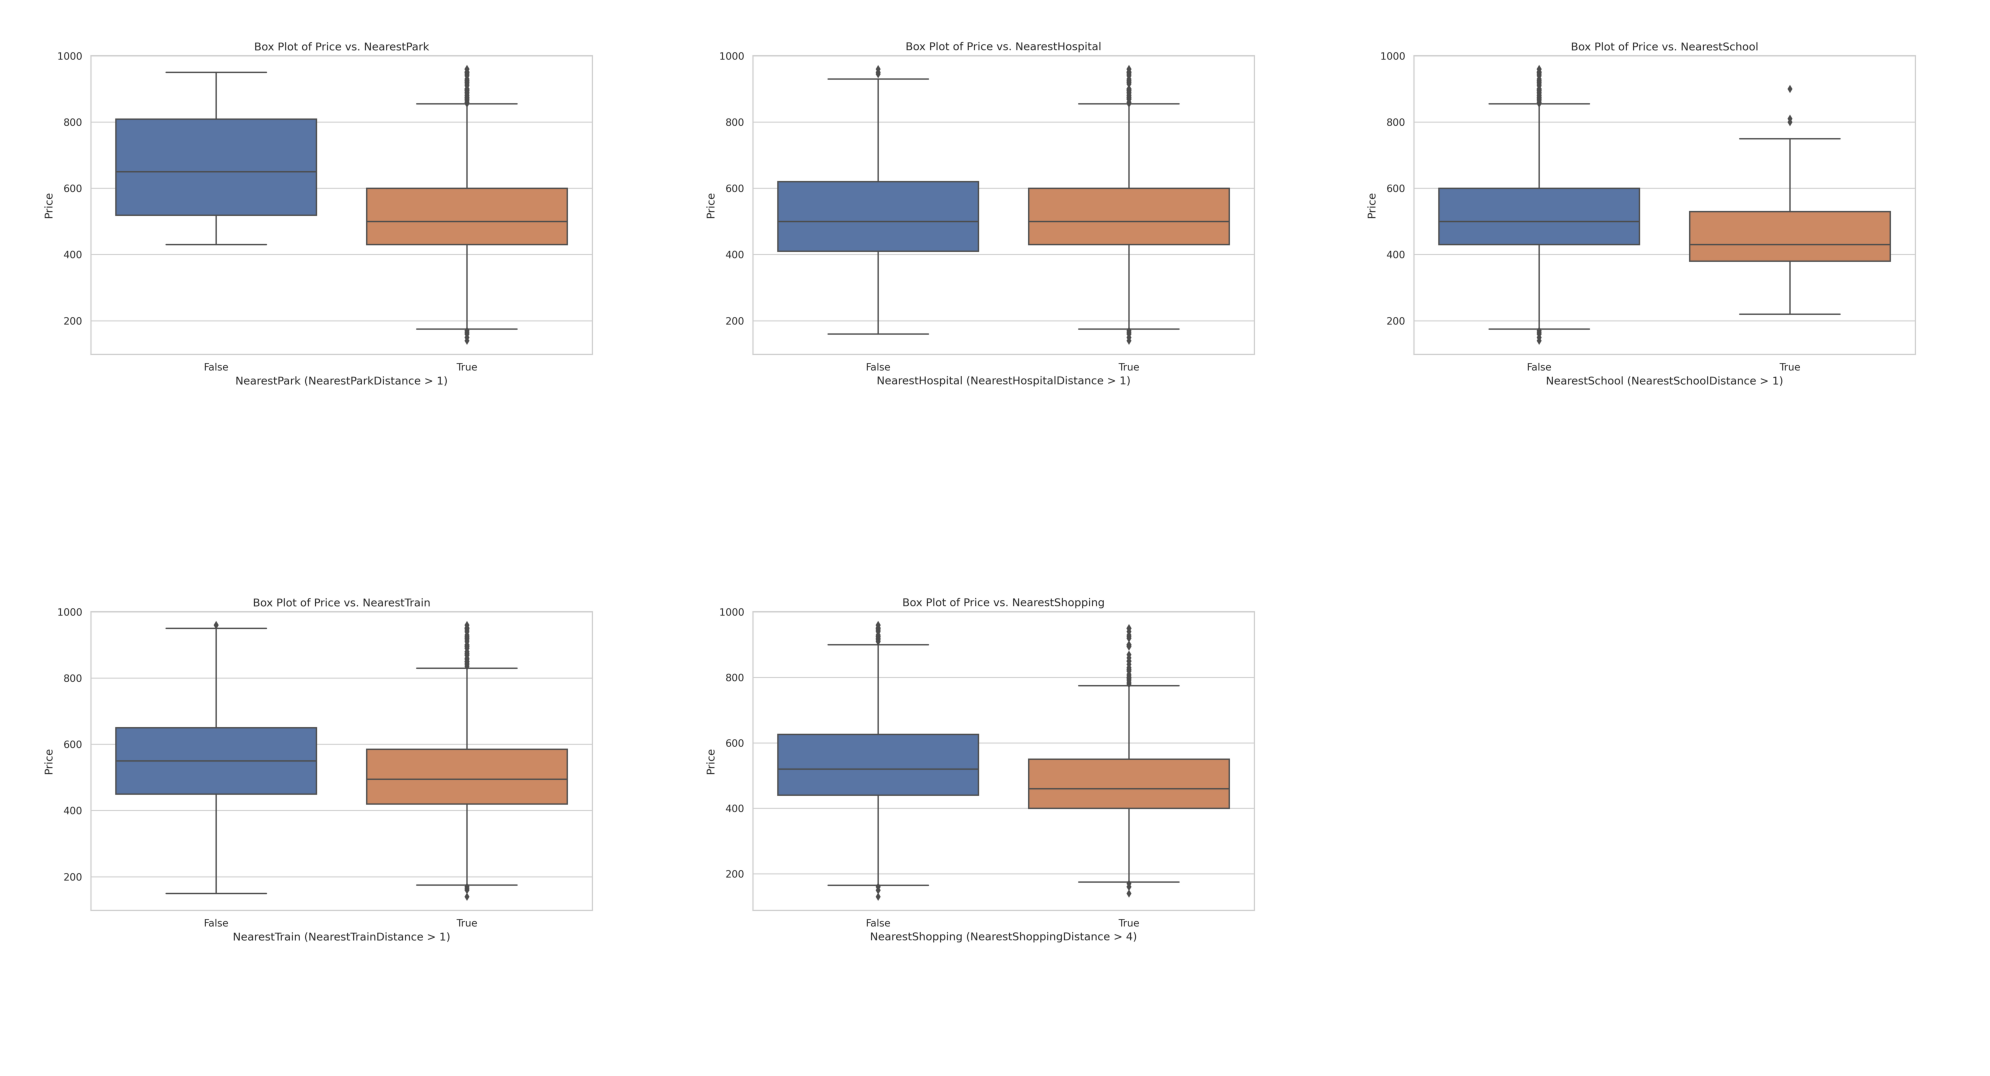

In [10]:
def display_images_in_grid(image_paths, grid_shape=(2, 3)):

    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(20, 12))

    for ax, img_path in zip(axes.ravel(), image_paths):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')  # Turn off axis numbers and ticks

    # For remaining sub-plots which don't have an image, turn off axis
    for i in range(len(image_paths), grid_shape[0] * grid_shape[1]):
        axes.ravel()[i].axis('off')

    plt.tight_layout()
    plt.show()

# Define your image paths here
image_paths = [
    'plots/boxplot_park.png',
    'plots/boxplot_hospital.png',
    'plots/boxplot_school.png',
    'plots/boxplot_train.png',
    'plots/boxplot_shop.png'
]

display_images_in_grid(image_paths)

To further verify their correlation, the following F-test is constructed.

Our research up to this point can be concluded that the external datasets we have used regarding the amenities in the neighborhood of the properties are basically closely related to the goals we are exploring 

### Correlation Heatmap

To show the correlation between price and overall features, the heatmap is plotted. The heatmap revealed that the number of bedrooms, bathrooms and parkings, as well as population, crime rates, and income, exhibit higher correlations with rental price, indicating their potential significance in predicting rental prices. However, other variables displayed weaker correlations, suggesting that they may have less linear impact on rental prices.

<div style="text-align:center;">
  <img src="plots/correlation_heatmap.png" width="1000">
</div>

### Significant Internal Features

As the values of bed & bath are higher in the correlation heatmap. It is essential to check it by plotting bar chart. And it shows the greater numbers of bathrooms or beds, the higher average rental prices.

![Alt text](plots/Average_Price_by_Number_of_Beds_Baths.png)

## Geospatial Plot & Preliminary Analysis

### Rental Price Geoplot

After combining the listing data we already had with the SA2 postcodes, we had the ability to plot the average rental price on a map based on each district.

<div style="text-align:center;">
  <img src="plots/rental_price.png" width="400">
</div>

In this geospatial plot, we can observe some of the areas have many conflicts with everyday perceptions or assumptions. After we have investigated these areas, we realize that these phenomena are due to specific reasons. For instance, in our opinion, properties are definitely on the high side in the areas around Melbourne's city center, so there shouldn't be as many blanks. After checking, we were able to determine that there were indeed no properties in those areas, which are parks, the airport and waterside locations.

### External Dataset Plot

Similarly, we can plot the distribution of population size, crime rate, and average income in different regions based on the regional distribution of SA2.

<div style="text-align:center;">
  <img src="plots/income.png" width="260" style="display:inline-block; margin-right:10px;">
  <img src="plots/cirme.png" width="260" style="display:inline-block; margin-right:10px;">
  <img src="plots/population.png" width="260" style="display:inline-block;">
</div>


The presented ANOVA table summarizes the results of an analysis of variance (ANOVA) for a regression model. 



In [6]:
anova_table = pd.read_csv('../data/curated/ANOVA_table.csv')
anova_table

,Unnamed: 0,sum_sq,df,F,PR(>F)
0,C(School),4.439441e+05,1.0,21.711859,3.214544e-06
1,C(Shop),1.291919e+05,1.0,6.318357,1.196704e-02
2,C(Train),9.315847e+06,1.0,455.607710,1.292267e-98
3,C(Hosptial),3.412187e+04,1.0,1.668789,1.964545e-01
4,C(Park),8.365232e+05,1.0,40.911624,1.673406e-10
5,Residual,1.809362e+08,8849.0,NaN,NaN


# Modelling

## Machine Learning Models

In this section, we delve into the core of our analysis, where we employ various machine learning techniques to predict rental prices for the years 2023, 2024, 2025, and 2026. Our chosen features for prediction are population, income, and crime rates, as they have been determined to be significant factors in estimating rental prices based on our earlier analysis.


### Relationships

To initiate our analysis, we begin with some useful models that is more interpretable, including k-nearest neighbors (KNN), neural networks, and random forests. We train these models using the dataset to establish the relationship between rental prices in 2023 and our selected features: population, income, and crime rates. After training, we evaluate the model's predictive performance on the test dataset using essential metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). This allows us to gauge the accuracy of our predictions.

### Feature Prediction

In the next step, we shift our focus to predicting the features themselves for the years 2024, 2025, and 2026. For this task, we train separate linear regression models for each feature. These models will assist us in estimating future population, income, and crime rates. In cases where it's necessary, we can also employ these models to predict missing values for the year 2023.

### Price Prediction

In the above analysis, we can leverage the predictive models trained on the relationship between rental prices and selected features to forecast rental prices for the years 2024, 2025, and 2026 based on the predicted values of these features for those years. Using the established linear regression, KNN, neural network, and random forest models, we make predictions for rental prices in these future years and then evaluate the accuracy and performance of these predictions. This allows us to gain insights into the expected trends in rental prices, considering the anticipated changes in population, income, and crime rates over the next three years.


## ARIMA Model:

**Reason for Selection:**

1. **Objective**: Our primary objective is to forecast housing prices for each district over the next three years (2024, 2025, and 2026). Considering the temporal character of our dataset, traditional machine learning models might not be proficient in encapsulating the time patterns inherent to it. Consequently, a time-series model was the evident choice.

2. **ARIMA Model**: ARIMA (Autoregressive Integrated Moving Average) is a prevalent time series model adept at identifying trends, seasonality, and noise in data. Since we lack definitive knowledge of certain patterns (like seasonality) in our dataset, the ARIMA model becomes a judicious choice due to its versatility in managing multiple patterns at once.

3. **Parameter Selection**: For the parameterization of the ARIMA model, we initially conducted a visual analysis of the time series, ACF (Autocorrelation Function), and PACF (Partial Autocorrelation Function) plots for a random subset of districts. The majority of the districts demonstrated a steadily increasing trend, while a few displayed fluctuations attributed to external factors like pandemics. To ensure optimal forecasting across diverse districts and to sidestep the manual selection of parameters, we automated the process. Using the `auto_arima` function from the `pmdarima` library, we could ascertain the most fitting parameters for each district based on the Mean Squared Error (MSE). This bespoke approach optimizes the model's performance tailored to the unique characteristics of each district.

![time_CBD-St_Kilda_Rd.png](plots/time_CBD-St_Kilda_Rd.png)
![time_Fitzroy_North-Clifton_Hill.png](plots/time_Fitzroy_North-Clifton_Hill.png)
![time_North_Melbourne-West_Melbourne.png](plots/time_North_Melbourne-West_Melbourne.png)
![time_Warrnambool.png](plots/time_Warrnambool.png)


**Model Explanation:**

- **Components of ARIMA Model**: The ARIMA model blends three main components: Autoregression (AR), Integration (I), and Moving Average (MA). Together, these facets enable the model to detect and represent various time series patterns.
  
  - **AR (Autoregression)**: It factors in the interdependence of past values on present ones, thus encapsulating the series' autocorrelation.
  
  - **I (Integration)**: Ensures the time series data's stationarity, a fundamental requirement for most time series methods. A stationary series has constant statistical properties over time.
  
  - **MA (Moving Average)**: Addresses the white noise or random fluctuations in the series.
  
- **Forecasting**: Post model calibration, it's harnessed to project housing prices for each district over the upcoming three years. Such forecasts equip stakeholders with valuable foresight on future housing price trajectories.

To sum it up, the ARIMA model is a potent tool tailored for time series forecasting. By streamlining and automating the parameter selection process, we've positioned the model to mirror the intrinsic patterns in the data more accurately, assuring enhanced predictive accuracy.



**Growth Rate Formula**

The growth rate of prices between 2023 and 2026 is calculated using the formula:

$Growth Rate = \frac{(Price\ in\ 2026 - Price\ in\ 2023)}{Price\ in\ 2023} \times 100$

Where:
- **Price in 2023** is the price of the property in the year 2023.
- **Price in 2026** is the predicted price of the property in the year 2026.

Based on the computed growth rates, we've identified the top 10 areas predicted to have the highest growth rate between 2023 and 2026. We then visually represent these areas and their corresponding growth rates using a scatter plot. This visual representation offers an intuitive reference, allowing for quick identification of future potential high-growth areas. Such a graphical display facilitates rapid recognition of target areas with potential high investment returns.

![top10.png](plots/top10.png)



## 4. Most 10 liveable suburbs

With the above data, we can judge the livability of each suburb by their attribute characteristics and select the ten most livable and affordable suburb. After consolidation, we have selected the following features for our combined judgement:

- **Average_income**: Areas with higher average incomes tend to imply better economic conditions, more employment opportunities and relatively healthy businesses. This provides residents with a greater sense of economic security.

- **Population**: An area that is doing well economically and offers an abundance of job opportunities is more likely to attract people to live there. People always tend to move to places with better job opportunities.

- **Crime_rate**: Safety is usually the first thing people consider when choosing where to live. An area with a low crime rate will make residents feel safer and more comfortable. 

- **School_counts**: The number of schools may reflect how much the local government invests in and values education. A community that focuses on education may offer better educational resources, extracurricular activities and opportunities for academic competition.

- **Park_counts**: Parks enhance the quality of life by providing places for relaxation and recreation. People can walk, exercise, picnic, and gather with family and friends in parks, and these activities are beneficial to mental health and social wellbeing.

- **Hospital_counts**: A high number of hospitals means that residents can access health care services more easily. This is especially important for seniors, children, and residents with special medical needs. And more hospitals may mean that residents can be treated more quickly in an emergency, such as a sudden injury or other medical emergency.

- **Train_station_counts**: A high number of metro stations usually means that residents and visitors to the area can travel elsewhere more easily. This makes it easier to get to work, shop, play and visit other city facilities.

- **Mall_counts**: The number of shopping centres often means that residents have easier access to daily necessities, entertainment and dining. This helps to improve the quality of life and satisfaction of residents.

Thereafter we assigned weight proportions and normalised the values for each of the above attributes. This was done in order to derive a specific value for their livability by calculating these attributes, so that the livability of each area could be judged by sorting these values.

In [7]:
livabile

,postcode,livability_score
0,3919,0.640841
1,3915,0.617110
2,3146,0.612525
3,3913,0.606643
4,3144,0.594038
5,3018,0.585742
6,3638,0.585353
7,3636,0.584282
8,3084,0.581495
9,3015,0.574476


The geo-plot shows the locations of top 10 surburbs in the map.

<img src="plots/top10_map.png" style="width: 700px;"/>

## Limitation and Improvemnet

There are some limitations:
- some areas have few rental listings from our web scraping, which affects our analysis
- gaps in our historical data with some missing years.
- api for driving distance for OpenRouteService has daily request and time comsuptions

In terms of enhancing our project:

- With more support funding, we could leverage domain-specific paid APIs for richer, gap-free data. 
- Although our current API has its limitations in terms of daily requests and time consumption, we've identified potential alternatives like 'osrm' for future exploration.
- Our vision is to incorporate broader features, living conditions, and landlord reputations, for a more comprehensive analysis and more complex prediction models. 
- In future, it will spent 3 weeks to improve project which include convert the result into website or applications which the agent, middle aged and elderlys can easily use